<a href="https://colab.research.google.com/github/Crispyjones7387/STOCK-Market/blob/master/TSF_for_future_predictions_using_SARIMA_%26_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
sns.set_style('whitegrid')
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})

%matplotlib inline
from pandas_datareader.data import DataReader

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
df = DataReader('AMZN', data_source='yahoo', start='2010-01-01', end='2020-04-02') #get 10 years of data
temp = df
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
2010-01-08,133.679993,129.029999,130.559998,133.520004,9830500,133.520004
...,...,...,...,...,...,...
2020-03-27,1939.790039,1899.920044,1930.859985,1900.099976,5387900,1900.099976
2020-03-30,1973.630005,1912.339966,1922.829956,1963.949951,6126100,1963.949951
2020-03-31,1993.020020,1944.010010,1964.349976,1949.719971,5123600,1949.719971


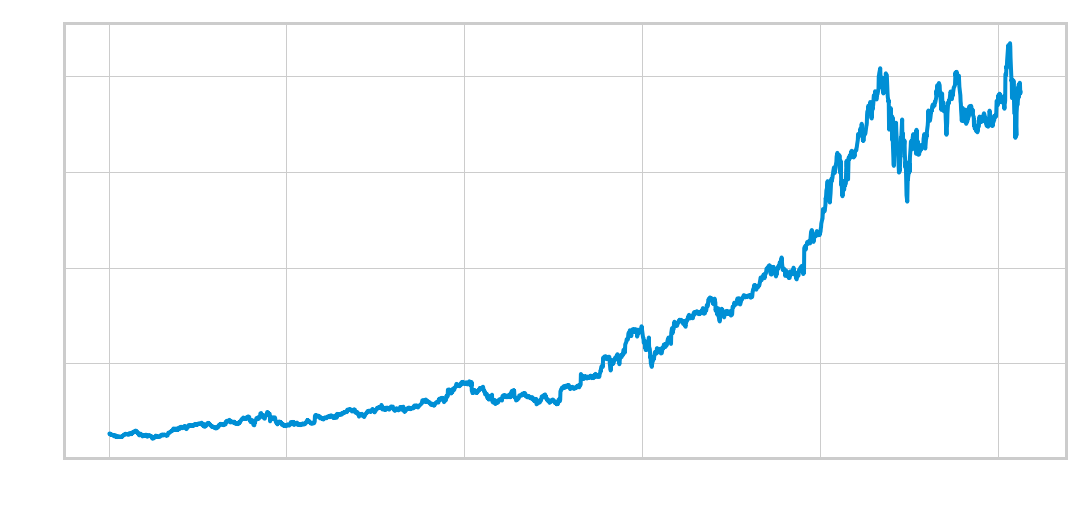

In [0]:
plt.figure(figsize=(16,8))
plt.title('Amazons closing price history for the past 10 years',color='white')
plt.plot(df['Close'])
plt.xlabel('Year', fontsize=12,color='white')
plt.ylabel('Close Price USD ($)', fontsize=12,color='white')
plt.tick_params(direction='out', length=6, width=2, colors='w')
plt.show()

In [0]:
data = df.filter(['Close'])

In [0]:
y = data['Close'].resample('MS').mean()

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
y['2017':]

Date
2017-01-01     807.505002
2017-02-01     835.745268
2017-03-01     854.240001
2017-04-01     903.385790
2017-05-01     961.719546
2017-06-01     990.444089
2017-07-01    1008.483997
2017-08-01     971.436523
2017-09-01     968.992499
2017-10-01    1000.719996
2017-11-01    1139.808100
2017-12-01    1168.841492
2018-01-01    1309.010946
2018-02-01    1442.363146
2018-03-01    1540.367629
2018-04-01    1468.220471
2018-05-01    1594.903637
2018-06-01    1698.823812
2018-07-01    1784.649042
2018-08-01    1897.851308
2018-09-01    1966.077900
2018-10-01    1782.058265
2018-11-01    1625.483823
2018-12-01    1559.443154
2019-01-01    1640.032389
2019-02-01    1626.937365
2019-03-01    1722.491908
2019-04-01    1866.202375
2019-05-01    1869.383179
2019-06-01    1852.617505
2019-07-01    1965.882280
2019-08-01    1793.602722
2019-09-01    1799.120996
2019-10-01    1752.331750
2019-11-01    1774.293994
2019-12-01    1785.772845
2020-01-01    1884.237613
2020-02-01    2066.175267
2020-03

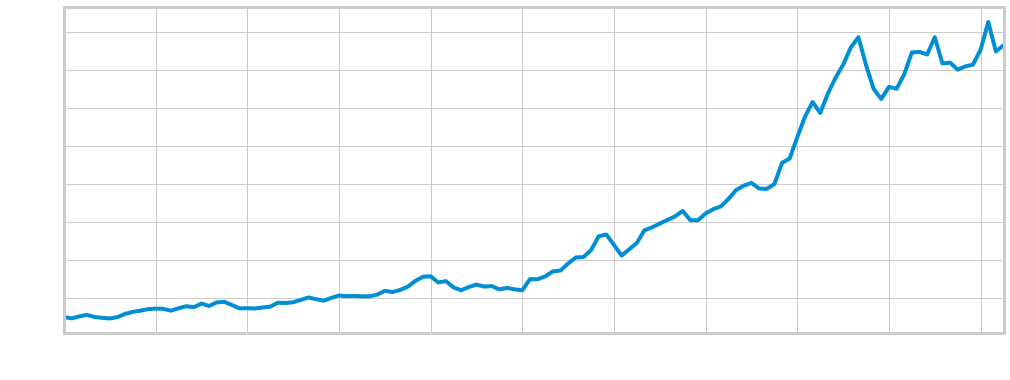

In [0]:
y.plot(figsize=(15, 6))
plt.xlabel('Year', fontsize=12,color='white')
plt.ylabel('Closing Price USD ($)', fontsize=12,color='white')
plt.tick_params(direction='out', length=6, width=2, colors='w')
plt.show()

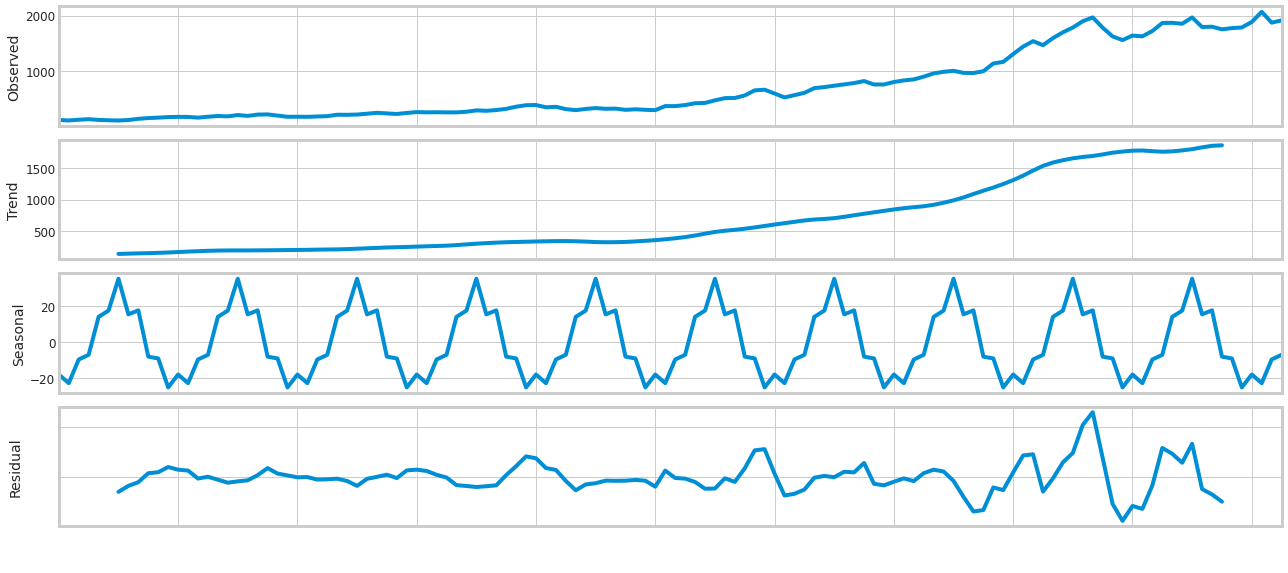

In [0]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.xlabel('Year', fontsize=12,color='white')
#plt.ylabel('Close Price USD ($)', fontsize=12,color='white')
plt.tick_params(direction='out', length=6, width=2, colors='w')
plt.show()

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2036.5938389317316
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1853.9331389466718
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1569.5171725654784
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1396.0353152196278
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1519.842875526769
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1475.911053409361
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1398.0000678107626
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1372.808636346455
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1867.8962893144196
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1598.1710727948685
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1429.6841560889782
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1273.9418801619472
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1403.4366309227792
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1352.0807181823352
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1291.8052130579074
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1258.4028199471134
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1343.8232762941432
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1224.402601132

`ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1092.1743057419844`

Seems like an optimal solution & fit that to arima model

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1088      0.073      1.480      0.139      -0.035       0.253
ar.S.L12      -0.6120      0.131     -4.663      0.000      -0.869      -0.355
ma.S.L12      -0.4332      0.167     -2.600      0.009      -0.760      -0.107
sigma2      4096.4913    483.350      8.475      0.000    3149.142    5043.841


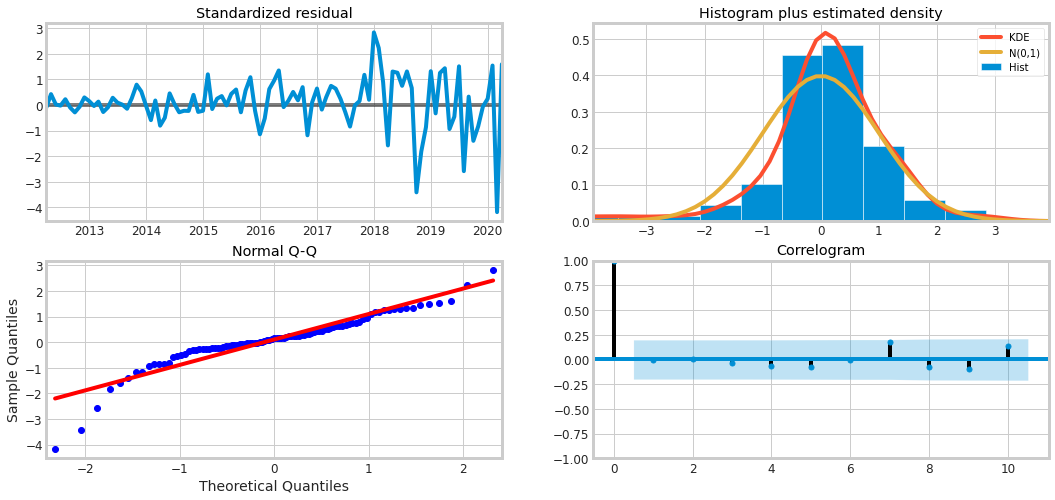

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


*Above diagnostics sorta show normalized behavior*

*Just a comparison between predicted Close prices to real Close prices from 2017 till present*

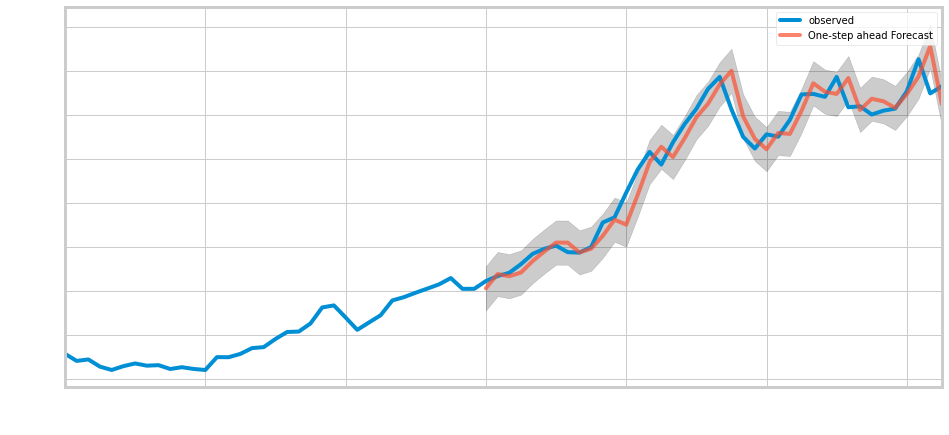

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Close price',color='white')
plt.tick_params(direction='out', length=6, width=2, colors='w')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 8460.57


In [0]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 91.98


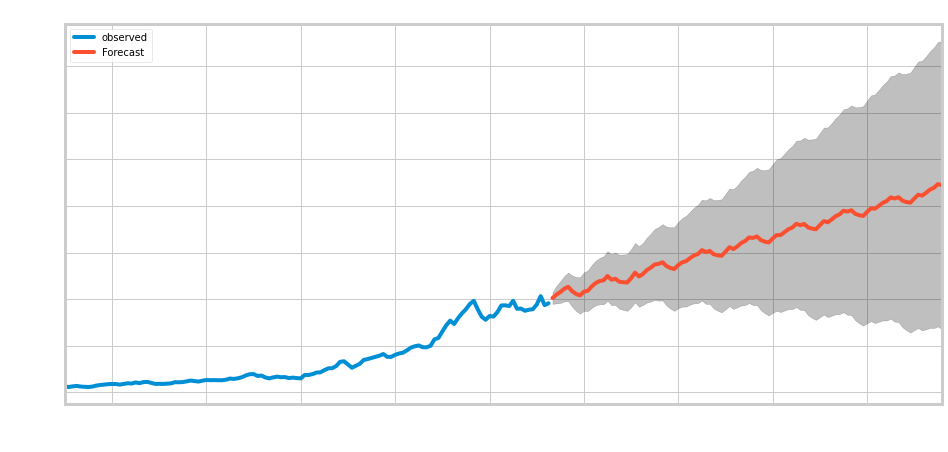

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Closing price',color='white')
ax.set_title('Amazons closing pricing',color='white')
plt.tick_params(direction='out', length=6, width=2, colors='w')
plt.legend(loc='upper left')
plt.show()

In [0]:
from fbprophet import Prophet

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

**Try out the same using Prophet**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

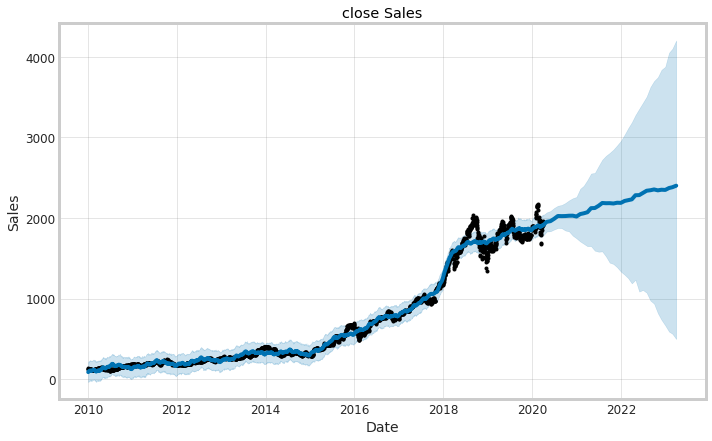

In [0]:
from fbprophet import Prophet

tmp = data.reset_index()

close = tmp.rename(columns={'Date': 'ds', 'Close': 'y'})
close_model = Prophet(interval_width=0.95)
close_model.fit(close)

close_forecast = close_model.make_future_dataframe(periods=36, freq='MS') #predict for the next 3 years
close_forecast = close_model.predict(close_forecast)

plt.figure(figsize=(18, 6))
close_model.plot(close_forecast, xlabel = 'Date', ylabel = 'Closing price')
plt.title('Amazon closing Sales');

In [0]:
close_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,121.062177,-18.425028,208.165984,121.062177,121.062177,-31.244151,-31.244151,-31.244151,-3.449783,-3.449783,-3.449783,-27.794368,-27.794368,-27.794368,0.0,0.0,0.0,89.818025
1,2010-01-05,121.195230,-31.830065,206.220646,121.195230,121.195230,-27.414759,-27.414759,-27.414759,-1.346774,-1.346774,-1.346774,-26.067985,-26.067985,-26.067985,0.0,0.0,0.0,93.780471
2,2010-01-06,121.328284,-35.656925,223.375814,121.328284,121.328284,-26.302223,-26.302223,-26.302223,-1.945982,-1.945982,-1.945982,-24.356241,-24.356241,-24.356241,0.0,0.0,0.0,95.026061
3,2010-01-07,121.461337,-15.457391,207.377318,121.461337,121.461337,-24.364555,-24.364555,-24.364555,-1.673778,-1.673778,-1.673778,-22.690777,-22.690777,-22.690777,0.0,0.0,0.0,97.096782
4,2010-01-08,121.594390,-20.586376,214.415655,121.594390,121.594390,-24.163551,-24.163551,-24.163551,-3.062435,-3.062435,-3.062435,-21.101116,-21.101116,-21.101116,0.0,0.0,0.0,97.430840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,2022-12-01,2362.447574,737.927615,3837.848025,778.188916,3820.829102,-11.483300,-11.483300,-11.483300,-1.673778,-1.673778,-1.673778,-9.809523,-9.809523,-9.809523,0.0,0.0,0.0,2350.964273
2612,2023-01-01,2376.107006,668.687075,3875.563888,690.313829,3906.996573,-27.365898,-27.365898,-27.365898,5.739378,5.739378,5.739378,-33.105276,-33.105276,-33.105276,0.0,0.0,0.0,2348.741108
2613,2023-02-01,2389.766438,592.199881,4049.542321,609.299875,3998.396717,-17.509513,-17.509513,-17.509513,-1.945982,-1.945982,-1.945982,-15.563531,-15.563531,-15.563531,0.0,0.0,0.0,2372.256925
2614,2023-03-01,2402.103990,564.512425,4100.066189,544.187243,4095.153264,-19.700413,-19.700413,-19.700413,-1.945982,-1.945982,-1.945982,-17.754431,-17.754431,-17.754431,0.0,0.0,0.0,2382.403577


In [0]:
close_names = ['close_%s' % column for column in close_forecast.columns]

merge_close_forecast = close_forecast.copy()
merge_close_forecast.columns = close_names
forecast = merge_close_forecast.rename(columns={'close_ds': 'Date'})

forecast.head()

,Date,close_trend,close_yhat_lower,close_yhat_upper,close_trend_lower,close_trend_upper,close_additive_terms,close_additive_terms_lower,close_additive_terms_upper,close_weekly,close_weekly_lower,close_weekly_upper,close_yearly,close_yearly_lower,close_yearly_upper,close_multiplicative_terms,close_multiplicative_terms_lower,close_multiplicative_terms_upper,close_yhat
0,2010-01-04,121.062177,-18.425028,208.165984,121.062177,121.062177,-31.244151,-31.244151,-31.244151,-3.449783,-3.449783,-3.449783,-27.794368,-27.794368,-27.794368,0.0,0.0,0.0,89.818025
1,2010-01-05,121.195230,-31.830065,206.220646,121.195230,121.195230,-27.414759,-27.414759,-27.414759,-1.346774,-1.346774,-1.346774,-26.067985,-26.067985,-26.067985,0.0,0.0,0.0,93.780471
2,2010-01-06,121.328284,-35.656925,223.375814,121.328284,121.328284,-26.302223,-26.302223,-26.302223,-1.945982,-1.945982,-1.945982,-24.356241,-24.356241,-24.356241,0.0,0.0,0.0,95.026061
3,2010-01-07,121.461337,-15.457391,207.377318,121.461337,121.461337,-24.364555,-24.364555,-24.364555,-1.673778,-1.673778,-1.673778,-22.690777,-22.690777,-22.690777,0.0,0.0,0.0,97.096782
4,2010-01-08,121.594390,-20.586376,214.415655,121.594390,121.594390,-24.163551,-24.163551,-24.163551,-3.062435,-3.062435,-3.062435,-21.101116,-21.101116,-21.101116,0.0,0.0,0.0,97.430840


Text(0.5, 1.0, 'Amazons close pricing trend')

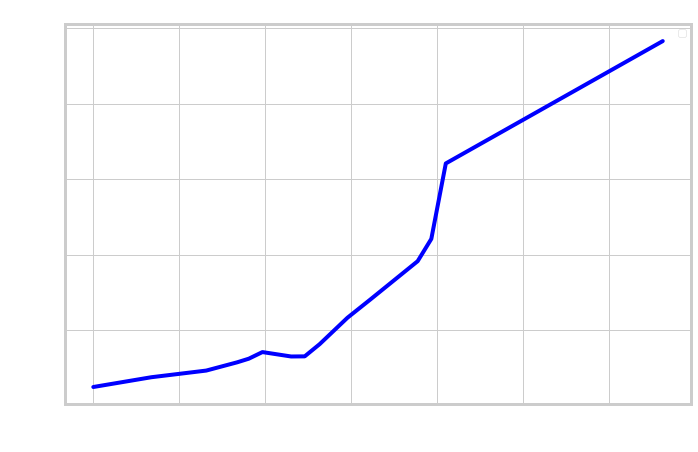

In [0]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['close_trend'], 'b-')

plt.legend() 
plt.xlabel('Date',color='white') 
plt.ylabel('Closing',color='white')
plt.tick_params(direction='out', length=6, width=2, colors='w')
plt.legend()
plt.title('Amazons closing pricing trend',color='white')

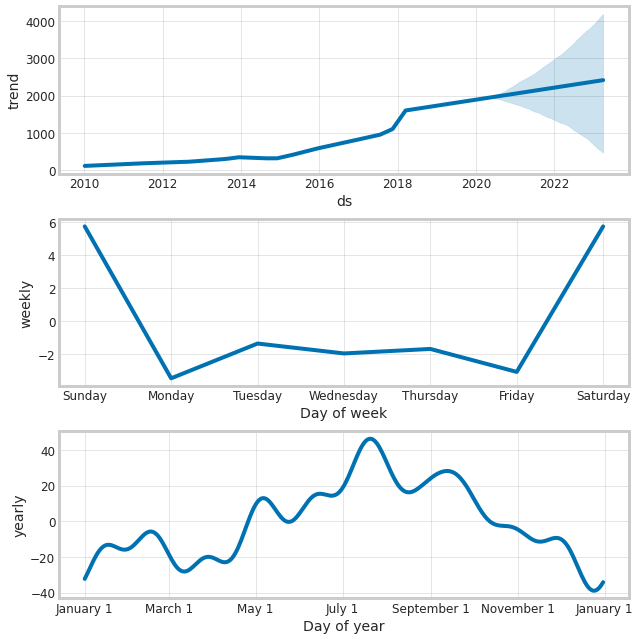

In [0]:
close_model.plot_components(close_forecast);

Interesting components